# Handwritten digits classification (Tensorflow)

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from PIL import Image

#### Data load and visualization

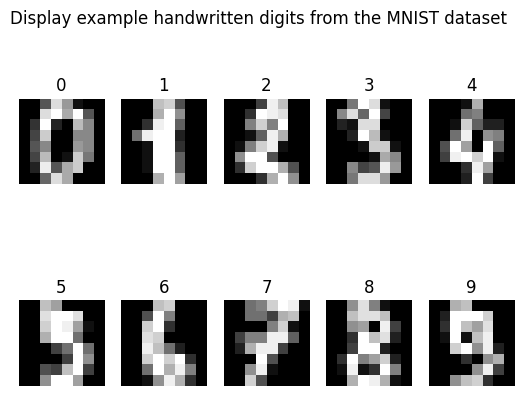

In [2]:
digits = load_digits()

for num in range(10):
    idx = list(digits.target).index(num)

    plt.subplot(2, 5, num + 1)
    plt.imshow(digits.images[idx], cmap='gray')
    plt.title(f"{num}")
    plt.axis('off')

plt.suptitle("Display example handwritten digits from the MNIST dataset")
plt.show()

#### Split dataset into training and test sets

In [3]:
X = digits.data
y = digits.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

#### Create a Sequential neural network model

In [4]:
model = Sequential([
    Dense(units=20, activation="relu"), # Hidden layer with 15 units using ReLU activation
    Dense(units=15, activation="relu"), # Hidden layer with 15 units using ReLU activation
    Dense(units=10, activation="linear"), # Output layer with 10 units (one per class) using linear activation
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Here we use the softmax loss function for classification
    optimizer=tf.keras.optimizers.Adam(0.0001), # Adams optimization for learning rate
    metrics=['accuracy'] # To see the accuracy of the model
)

model.fit(X_train, y_train, epochs=40, batch_size=4, verbose=2)

Epoch 1/40
360/360 - 1s - 3ms/step - accuracy: 0.1273 - loss: 8.3946
Epoch 2/40
360/360 - 0s - 773us/step - accuracy: 0.1621 - loss: 3.5656
Epoch 3/40
360/360 - 0s - 763us/step - accuracy: 0.1969 - loss: 2.6089
Epoch 4/40
360/360 - 0s - 763us/step - accuracy: 0.2380 - loss: 2.2527
Epoch 5/40
360/360 - 0s - 761us/step - accuracy: 0.3034 - loss: 2.0028
Epoch 6/40
360/360 - 0s - 774us/step - accuracy: 0.3911 - loss: 1.7378
Epoch 7/40
360/360 - 0s - 763us/step - accuracy: 0.4878 - loss: 1.5125
Epoch 8/40
360/360 - 0s - 764us/step - accuracy: 0.5574 - loss: 1.3338
Epoch 9/40
360/360 - 0s - 788us/step - accuracy: 0.6166 - loss: 1.1777
Epoch 10/40
360/360 - 0s - 818us/step - accuracy: 0.6604 - loss: 1.0437
Epoch 11/40
360/360 - 0s - 763us/step - accuracy: 0.7015 - loss: 0.9305
Epoch 12/40
360/360 - 0s - 786us/step - accuracy: 0.7258 - loss: 0.8365
Epoch 13/40
360/360 - 0s - 782us/step - accuracy: 0.7550 - loss: 0.7535
Epoch 14/40
360/360 - 0s - 806us/step - accuracy: 0.7968 - loss: 0.6801
Epo

#### Evaluate the model accuracy on the test set

In [16]:
logits = model.predict(X_test)
y_pred = np.argmax(logits, axis=1)
print(f"The accuracy using the test data is {(np.mean(y_test == y_pred) * 100):.4}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
The accuracy using the test data is 94.17%
